# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from datetime import datetime
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name


#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#cities = [citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name for lat_lng in lat_lngs if citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name not in cities]

# Print the city count to confirm sufficient count
print(f"There are {len(cities)} unique cities.")

There are 634 unique cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
url = 'https://api.openweathermap.org/data/2.5/weather'
units = "metric"
temp = []
lat = []
lon = []
humidity_percent = []
cloudiness_percent = []
wind_speed = []
city_list = []
request_num = [x+1 for x in range(len(cities))]


for city in cities: 
    record = cities.index(city) + 1
    #set_num = 
    if record % 20 == 0: 
        #add a one second interval between queries to stay within API query limits 
        time.sleep(1)
        
        weather_response = requests.get(url, params={'appid': weather_api_key,'q': city,'units': units})
        response_json = weather_response.json()
        record = cities.index(city) + 1

        try: 
            city_list.append(response_json['name'])
            temp.append(response_json['main']['temp_max'])
            lat.append(response_json['coord']['lat'])
            lon.append(response_json['coord']['lon'])
            humidity_percent.append(response_json['main']['humidity'])
            cloudiness_percent.append(response_json['clouds']['all'])
            wind_speed.append(response_json['wind']['speed'])
            print(f"Processing Record {record} of Set 1 | {city}")

        except: 
            print(f"City not found. Skipping...")
            
        
    else:
        weather_response = requests.get(url, params={'appid': weather_api_key,'q': city, 'units': units})
        response_json = weather_response.json()
        record = cities.index(city) + 1

        try: 
            city_list.append(response_json['name'])
            temp.append(response_json['main']['temp_max'])
            lat.append(response_json['coord']['lat'])
            lon.append(response_json['coord']['lon'])
            humidity_percent.append(response_json['main']['humidity'])
            cloudiness_percent.append(response_json['clouds']['all'])
            wind_speed.append(response_json['wind']['speed'])
            print(f"Processing Record {record} of Set 1 | {city}")

        except: 
            print(f"City not found. Skipping...")

Processing Record 1 of Set 1 | pakxe
Processing Record 2 of Set 1 | taltal
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | ayan
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | todos santos
Processing Record 11 of Set 1 | ternate
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | oeiras
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | qui nhon
Processing Record 20 of Set 1 | grand gaube
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | eyl
City not found. Skipping...
Processing Record 24 of Set 1 | rio gallegos
Processing Record 25 of Set 1 | svetlogorsk

Processing Record 202 of Set 1 | along
City not found. Skipping...
Processing Record 204 of Set 1 | nan
Processing Record 205 of Set 1 | erding
Processing Record 206 of Set 1 | kirakira
Processing Record 207 of Set 1 | jumla
Processing Record 208 of Set 1 | sorong
Processing Record 209 of Set 1 | waynesville
Processing Record 210 of Set 1 | olafsvik
Processing Record 211 of Set 1 | thompson
Processing Record 212 of Set 1 | tahe
Processing Record 213 of Set 1 | talagang
Processing Record 214 of Set 1 | bossangoa
Processing Record 215 of Set 1 | baruun-urt
Processing Record 216 of Set 1 | zabol
Processing Record 217 of Set 1 | touros
Processing Record 218 of Set 1 | flin flon
Processing Record 219 of Set 1 | fereydun kenar
Processing Record 220 of Set 1 | mali
Processing Record 221 of Set 1 | chuy
Processing Record 222 of Set 1 | brae
City not found. Skipping...
Processing Record 224 of Set 1 | alexandria
Processing Record 225 of Set 1 | margate
Processing Record 226 of Set 1 | ilhabela


Processing Record 402 of Set 1 | awjilah
Processing Record 403 of Set 1 | port macquarie
Processing Record 404 of Set 1 | les cayes
Processing Record 405 of Set 1 | chimoio
Processing Record 406 of Set 1 | awbari
Processing Record 407 of Set 1 | turukhansk
Processing Record 408 of Set 1 | san carlos
Processing Record 409 of Set 1 | urumqi
Processing Record 410 of Set 1 | weligama
Processing Record 411 of Set 1 | hami
Processing Record 412 of Set 1 | zhanaozen
Processing Record 413 of Set 1 | rudbar
Processing Record 414 of Set 1 | san ramon de la nueva oran
Processing Record 415 of Set 1 | escanaba
Processing Record 416 of Set 1 | zholymbet
Processing Record 417 of Set 1 | isangel
Processing Record 418 of Set 1 | tank
Processing Record 419 of Set 1 | newport
Processing Record 420 of Set 1 | salaga
Processing Record 421 of Set 1 | balabac
Processing Record 422 of Set 1 | olinda
Processing Record 423 of Set 1 | pijijiapan
Processing Record 424 of Set 1 | bangangte
Processing Record 425 o

Processing Record 602 of Set 1 | ventspils
Processing Record 603 of Set 1 | chalus
Processing Record 604 of Set 1 | vila
Processing Record 605 of Set 1 | laredo
City not found. Skipping...
Processing Record 607 of Set 1 | sept-iles
Processing Record 608 of Set 1 | souillac
Processing Record 609 of Set 1 | adrar
Processing Record 610 of Set 1 | taoudenni
Processing Record 611 of Set 1 | san patricio
Processing Record 612 of Set 1 | port lincoln
Processing Record 613 of Set 1 | puerto quijarro
City not found. Skipping...
Processing Record 615 of Set 1 | athabasca
Processing Record 616 of Set 1 | port shepstone
Processing Record 617 of Set 1 | prince rupert
Processing Record 618 of Set 1 | atchison
Processing Record 619 of Set 1 | labuhan
Processing Record 620 of Set 1 | bichena
Processing Record 621 of Set 1 | tienen
Processing Record 622 of Set 1 | lensk
Processing Record 623 of Set 1 | maracacume
Processing Record 624 of Set 1 | khasan
Processing Record 625 of Set 1 | piacabucu
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({'City': city_list,'Temperature_Max': temp,'Latitude': lat, 'Longitude': lon,
                          'Humidity %': humidity_percent,'Cloudiness %':cloudiness_percent,
                         'Wind Speed': wind_speed})
city_data.to_csv(output_data_file, index = False, header = True)

In [5]:
city_data.head()

City  Temperature_Max  Latitude  Longitude  Humidity %  \
0              Pakse            33.00     15.12     105.78          46   
1             Taltal            15.27    -25.40     -70.48          89   
2         Bredasdorp            15.00    -34.53      20.04          93   
3              Kapaa            25.00     22.08    -159.32          69   
4  Saint Paul Harbor             5.00     57.79    -152.41          48   

   Cloudiness %  Wind Speed  
0            40        1.00  
1             7        2.00  
2            18        1.00  
3            90        4.68  
4             1       13.90

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
#setting today's date 
d= datetime.today().strftime('%m-%d-%y')

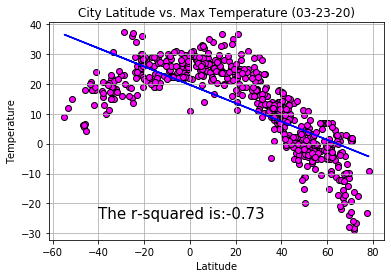

In [7]:
latitude = [lat for lat in city_data['Latitude']]
temp = [temp for temp in city_data['Temperature_Max']]

plt.scatter(latitude, temp, facecolors="magenta", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title(f"City Latitude vs. Max Temperature ({d})")
plt.grid()

latitude = np.array(latitude)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temp)
regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitude, regress_values, "b-")
r_squared = "The r-squared is:"+ str(round(rvalue,2))
plt.annotate(r_squared,(-40,-25), fontsize=15)

plt.savefig("../output_data/Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

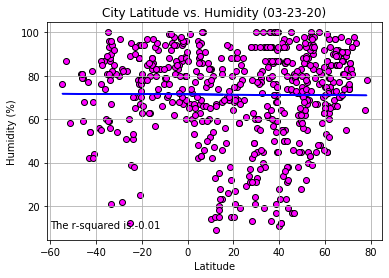

In [8]:
humidity = [humidity for humidity in city_data['Humidity %']]

plt.scatter(latitude, humidity, facecolors="magenta", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({d})")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity)
regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitude, regress_values, "blue")
r_squared = "The r-squared is:"+ str(round(rvalue,2))
plt.annotate(r_squared,(-60,10), fontsize=10)

plt.savefig("../output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

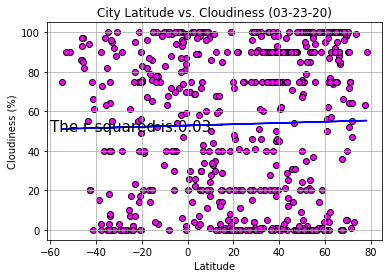

In [9]:
cloudiness = [cloudiness for cloudiness in city_data['Cloudiness %']]

plt.scatter(latitude, cloudiness, facecolors="magenta", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({d})")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness)
regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitude, regress_values, "blue")
r_squared = "The r-squared is:"+ str(round(rvalue,2))
plt.annotate(r_squared,(-60,50), fontsize=15)

plt.savefig("../output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

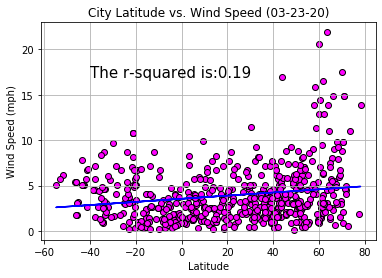

In [10]:
wind = [wind for wind in city_data['Wind Speed']]

plt.scatter(latitude, wind, facecolors="magenta", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({d})")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind)
regress_values = latitude * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitude, regress_values, "blue")
r_squared = "The r-squared is:"+ str(round(rvalue,2))
plt.annotate(r_squared,(-40,17), fontsize=15)

plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
#see above

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northernHemisphere = city_data.loc[city_data['Latitude']>=0]
northernHemisphere

southernHemisphere = city_data.loc[city_data['Latitude']<0]
southernHemisphere

City  Temperature_Max  Latitude  Longitude  Humidity %  \
1          Taltal            15.27    -25.40     -70.48          89   
2      Bredasdorp            15.00    -34.53      20.04          93   
5       Esperance            22.00    -33.87     121.90          56   
7         Mataura             6.11    -46.19     168.86          81   
8         Rikitea            25.97    -23.12    -134.97          70   
..            ...              ...       ...        ...         ...   
577    Maracaçumé            22.27     -2.04     -45.96          96   
579     Piaçabuçu            25.97    -10.41     -36.43          83   
582   Paragominas            22.17     -2.97     -47.48          98   
586   Port-Gentil            27.77     -0.72       8.78          80   
587  Christchurch            20.00    -43.53     172.63          77   

     Cloudiness %  Wind Speed  
1               7        2.00  
2              18        1.00  
5              75        3.10  
7              86        5.36  
8              80        0.24  
..            ...         ...  
577            95        0.62  
579            33        2.54  
582            87        0.57  
586            70        4.63  
587            55        5.10  

[165 rows x 7 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8926489407652832


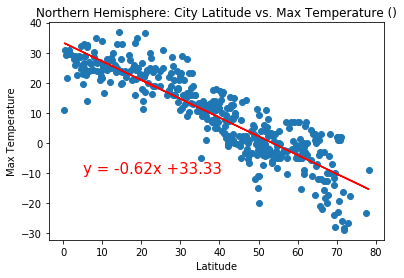

In [13]:
latitudeNorthern = [lat for lat in northernHemisphere['Latitude']]
tempNorthern = [temp for temp in northernHemisphere['Temperature_Max']]

plt.scatter(latitudeNorthern, tempNorthern)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature ()")

latitudeNorthern = np.array(latitudeNorthern)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeNorthern, tempNorthern)
regress_values = latitudeNorthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeNorthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(5,-10), fontsize=15, color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6258635108470297


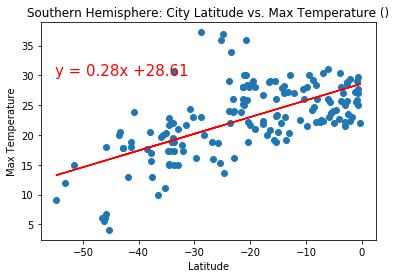

In [14]:
latitudeSouthern = [lat for lat in southernHemisphere['Latitude']]
tempSouthern = [temp for temp in southernHemisphere['Temperature_Max']]

plt.scatter(latitudeSouthern, tempSouthern)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature ()")

latitudeSouthern = np.array(latitudeSouthern)
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeSouthern, tempSouthern)
regress_values = latitudeSouthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeSouthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(-55,30), fontsize=15, color='red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23370876748151873


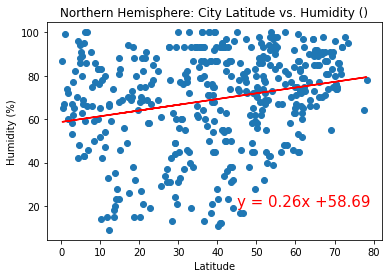

In [15]:
humidityNorthern = [humidity for humidity in northernHemisphere['Humidity %']]

plt.scatter(latitudeNorthern, humidityNorthern)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: City Latitude vs. Humidity ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeNorthern, humidityNorthern)
regress_values = latitudeNorthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeNorthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(45,20), fontsize=15, color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27585272683787493


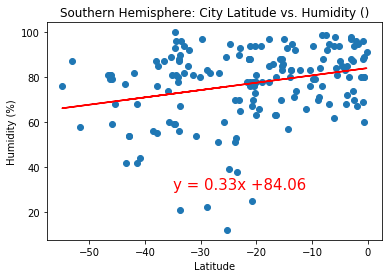

In [16]:
humiditySouthern = [humidity for humidity in southernHemisphere['Humidity %']]

plt.scatter(latitudeSouthern, humiditySouthern)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: City Latitude vs. Humidity ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeSouthern, humiditySouthern)
regress_values = latitudeSouthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeSouthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(-35,30), fontsize=15, color='red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14351409123947886


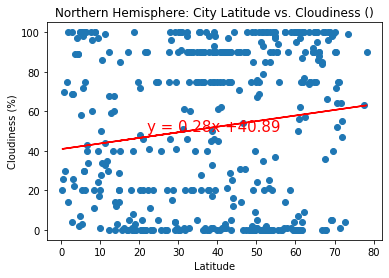

In [17]:
cloudinessNorthern = [cloudiness for cloudiness in northernHemisphere['Cloudiness %']]

plt.scatter(latitudeNorthern, cloudinessNorthern)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeNorthern, cloudinessNorthern)
regress_values = latitudeNorthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeNorthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(22,50), fontsize=15, color='red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16879269472547706


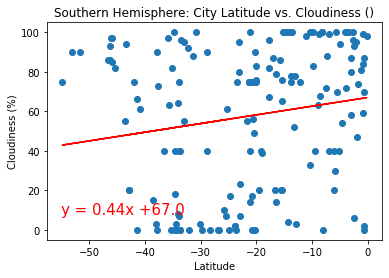

In [18]:
cloudinessSouthern = [cloudiness for cloudiness in southernHemisphere['Cloudiness %']]

plt.scatter(latitudeSouthern, cloudinessSouthern)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeSouthern, cloudinessSouthern)
regress_values = latitudeSouthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeSouthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(-55,8), fontsize=15, color='red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.29079683400101186


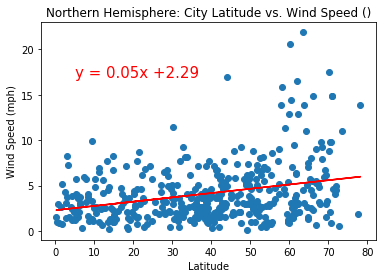

In [19]:
windNorthern = [wind for wind in northernHemisphere['Wind Speed']]

plt.scatter(latitudeNorthern, windNorthern)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeNorthern, windNorthern)
regress_values = latitudeNorthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeNorthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(5,17), fontsize=15, color='red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3737819165827444


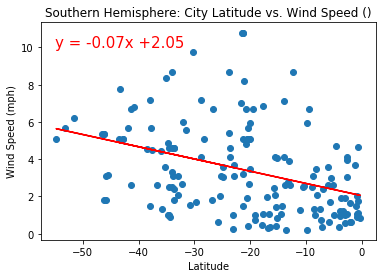

In [21]:
windSouthern = [wind for wind in southernHemisphere['Wind Speed']]

plt.scatter(latitudeSouthern, windSouthern)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed ()")

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitudeSouthern, windSouthern)
regress_values = latitudeSouthern * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(latitudeSouthern, regress_values, "r-")
print(f"The r-squared is: {rvalue}")

plt.annotate(line_eq,(-55,10), fontsize=15, color='red')
plt.show()